In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

In [8]:
start_date = pd.to_datetime('2013-04-29')
end_date = pd.to_datetime('2013-06-21')
tenor = '2Y'
# Shading the study period
study_start = pd.to_datetime('2013-05-27')
study_end = pd.to_datetime('2013-06-21')
phase_start = pd.to_datetime('2013-06-10')
date_nice = f'May - Jun 2013' 

In [9]:

# Filter the data for February and March for both datasets
df = pd.read_excel('data/volatility/irs_fix_float_volatility_20250121.xlsx')
#df['Trade Date'] = pd.to_datetime(df['Trade Date'])
df_usd = df[(df['Curr'] == 'USD') & (df['T'] == tenor)]
df_cad = df[(df['Curr'] == 'CAD') & (df['T'] == tenor)]
df_usd_filtered = df_usd[(df_usd['Trade_Date'] >= start_date) & (df_usd['Trade_Date'] <= end_date)].sort_values(by='Trade_Date')
df_cad_filtered = df_cad[(df_cad['Trade_Date'] >= start_date) & (df_cad['Trade_Date'] <= end_date)].sort_values(by='Trade_Date')


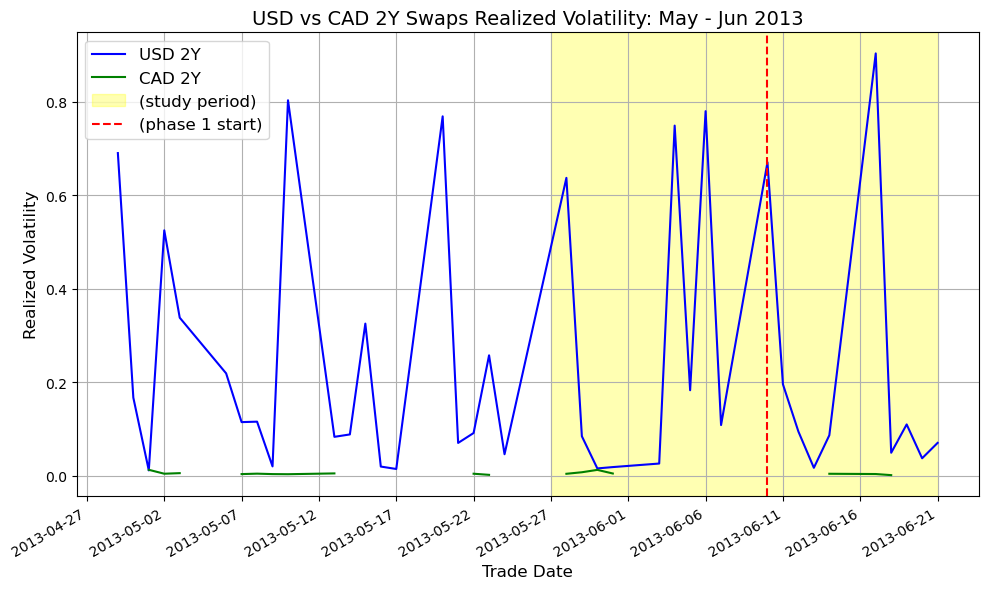

In [10]:
# Re-plotting with additional formatting for study period and phase 1 start

plt.figure(figsize=(10, 6))
plt.plot(df_usd_filtered['Trade_Date'], df_usd_filtered['std_return_1'], label=f'USD {tenor}', color='blue')
plt.plot(df_cad_filtered['Trade_Date'], df_cad_filtered['std_return_1'], label=f'CAD {tenor}', color='green')

plt.axvspan(study_start, study_end, color='yellow', alpha=0.3, label='(study period)')

# Adding a vertical dashed line for phase 1 start
plt.axvline(phase_start, color='red', linestyle='--', label='(phase 1 start)')

# Formatting the plot
plt.title(f'USD vs CAD {tenor} Swaps Realized Volatility: {date_nice}', fontsize=14)
plt.xlabel('Trade Date', fontsize=12)
plt.ylabel('Realized Volatility', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate() # Rotation

plt.tight_layout()
plt.show()
